In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv")

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [2]:
df.shape

(95662, 16)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
df[["Amount", "Value"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0


In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

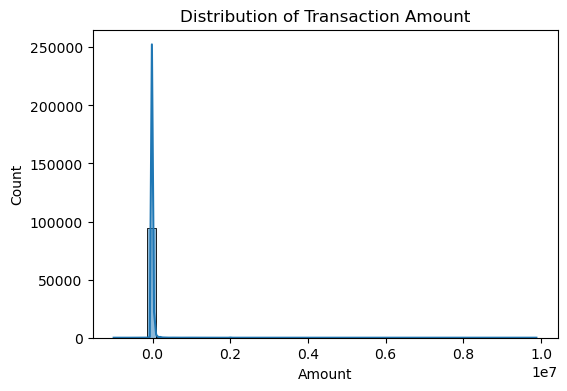

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()


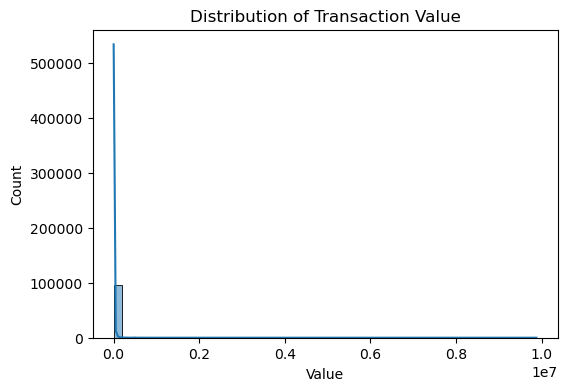

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df["Value"], bins=50, kde=True)
plt.title("Distribution of Transaction Value")
plt.show()


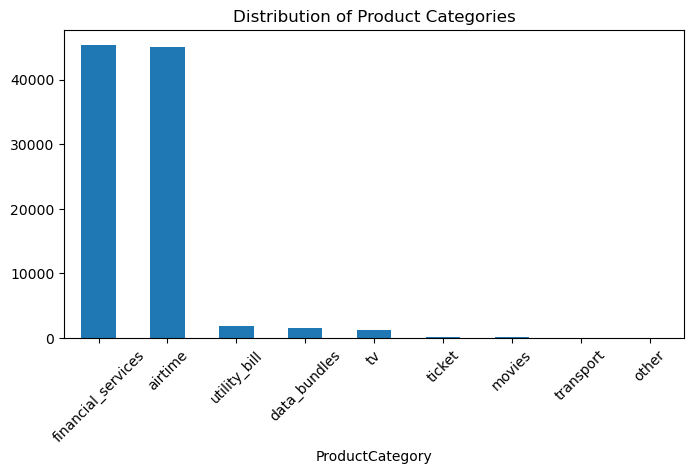

In [9]:
plt.figure(figsize=(8,4))
df["ProductCategory"].value_counts().plot(kind="bar")
plt.title("Distribution of Product Categories")
plt.xticks(rotation=45)
plt.show()


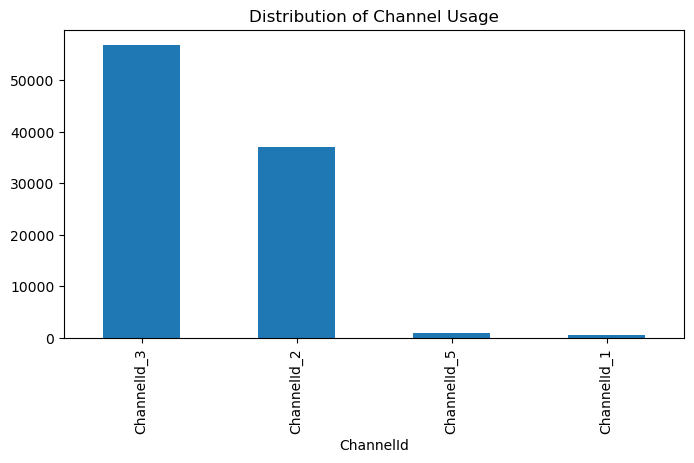

In [10]:
plt.figure(figsize=(8,4))
df["ChannelId"].value_counts().plot(kind="bar")
plt.title("Distribution of Channel Usage")
plt.show()


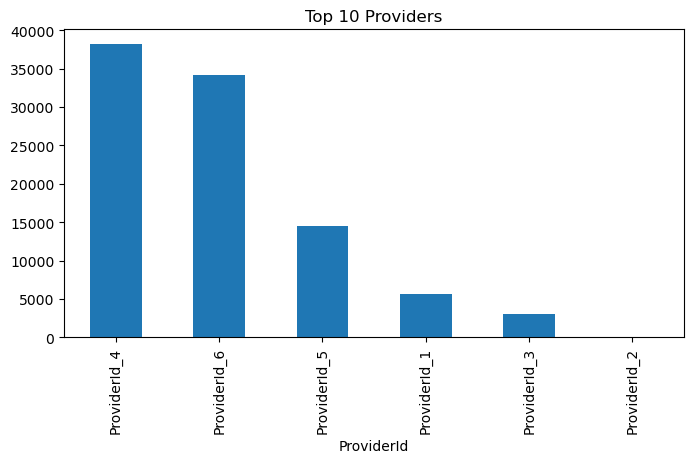

In [11]:
plt.figure(figsize=(8,4))
df["ProviderId"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Providers")
plt.show()


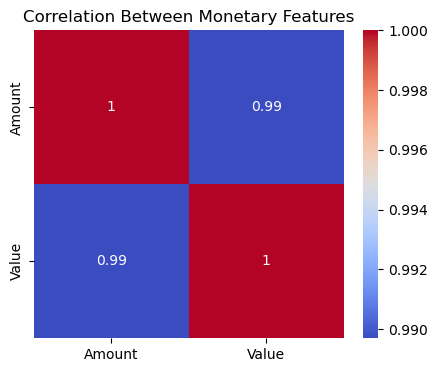

In [12]:
corr = df[["Amount", "Value"]].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Monetary Features")
plt.show()


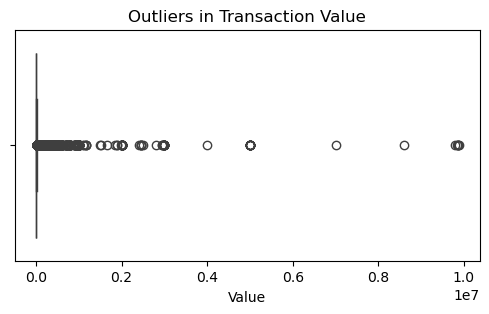

In [13]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Value"])
plt.title("Outliers in Transaction Value")
plt.show()


## Key Insights from Exploratory Data Analysis

1. Transaction values are highly right-skewed, with a small number of large transactions accounting for a disproportionate share of total monetary volume.  
   → Log transformation and aggregation are required.

2. The presence of both positive and negative transaction amounts indicates refunds and reversals, which are important behavioral signals rather than noise.  
   → Signed transaction behavior should be preserved during feature engineering.

3. ProductCategory, ChannelId, and ProviderId exhibit strong dominance and long-tail distributions.  
   → High-cardinality categorical features require grouping or frequency-based encoding.

4. Amount and Value are almost perfectly correlated, as Value is the absolute magnitude of Amount.  
   → One of these variables can be dropped after aggregation.

5. Transaction-level data shows substantial variability across customers, supporting customer-level aggregation using Recency, Frequency, and Monetary (RFM) features.
